<a href="https://colab.research.google.com/github/lizzochek/AI-labs-python/blob/master/Lab_1_Dolhova_IP_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Алгоритм генерації графа: 
1. Задаємо кількість вершин
2. Створюємо порожній граф
3. Кількість вершин в ряду - корінь з кількості всіх  вершин  
4. Створюємо номери вершин за допомогою arange  (повертає числа з інтервалом 1)
5. Робимо reshape отриманих номерів, щоб мати двовимірний масив номерів вершин за рядами
6. Для кожного елемента отриманого масиву (вершини): 
      
      6.1 Номер вершини - номер ряда * порядок у ряду
      
      6.2 Додаємо вершину, вказуючи її номер та номер ряда як label 
      
      6.3 Для всіх вершин, крім крайнього правого стовпця додаємо ребро до наступної вершини (горизонтальні шляхи)
      
      6.4 Для всіх вершин, крім нижнього ряду, додаємо ребро до відповідної вершини наступного ряду (вертикальні шляхи)

7. Для позиціонування лініями використовуємо multipartite layout
8. Виводимо граф.


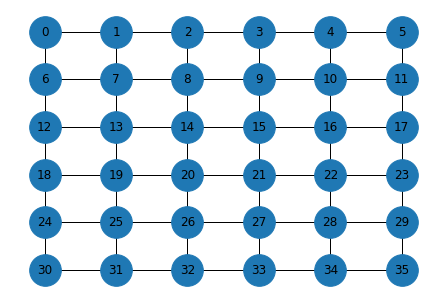

In [ ]:
import numpy as np;
import math;
import networkx as nx;

#1
num = 36;

#2
G = nx.Graph();
#3
row_range = int(math.sqrt(num));

#4
vertices = np.arange(0, num, 1)
#5
layers = vertices.reshape((row_range, row_range));

for i in range(row_range):
    for j in range(row_range):
        #6.1
        v = layers[j][i];    
        #6.2
        G.add_node(v, layer=i);
    
        #6.3
        if i != row_range - 1:
            G.add_edge(v, v+1);
        #6.4
        if v < num - row_range:
          G.add_edge(v, v + row_range);

#7
pos = nx.multipartite_layout(G, subset_key='layer');
#8
nx.draw(G, pos, node_size=1000, with_labels=True);

1. Зазначаємо кількість вершин для видалення
2. Встановлюємо кількість видалених вершин
3. Поки кількість видалених вершин менша за необхідну:

   3.1 Знаходимо випадкове ребро 

   3.2 Видаляємо це ребро

   3.3 Перевіряємо чи граф зв`язний

   3.4 Якщо зв`язний, видаляємо та змінюємо кількість видалених, якщо ні, повертаємо ребро у граф

4. Виводимо граф


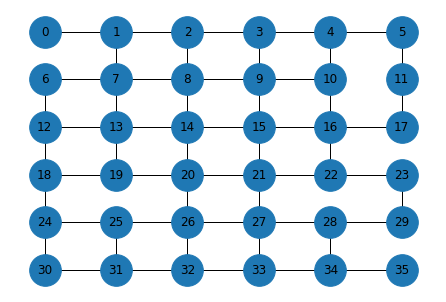

In [ ]:
import random

def remove_nodes(num: int = 5):
  #1
  to_remove_num = num;
  #2
  removed_num = 0;

  #3
  while removed_num < to_remove_num:
    #3.1
    edges = list(G.edges)
    random_edge = random.choice(edges)
    #3.2
    G.remove_edge(random_edge[0], random_edge[1]);
    #3.3
    connected = nx.is_connected(G);
    
    #3.4
    if connected:
      removed_num += 1;
    else:
      G.add_edge(random_edge[0], random_edge[1]);

remove_nodes(6);

nx.draw(G, pos, node_size=1000, with_labels=True);

Висновок:

У даній роботі було розроблено алгоритм для генерації графа, а також його виводу у формі квадратної сітки. Також було розроблено алгоритм видалення деякої випадкової кількості ребер з графа таким чином, щоб отримати зв`язний граф.